In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Construct the dataset

In [3]:
from sklearn.datasets import make_swiss_roll

In [4]:
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= 0.5

In [5]:
# Scale the data

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
X_scaled = MinMaxScaler().fit_transform(X)

In [8]:
def plot_3d(X, y=None, title=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', elev=8, azim=-80)
    ax.set_position([0, 0, 0.95, 1])
    cmap = None if y is None else plt.cm.nipy_spectral
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolor='black', lw=.5, c=y, cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

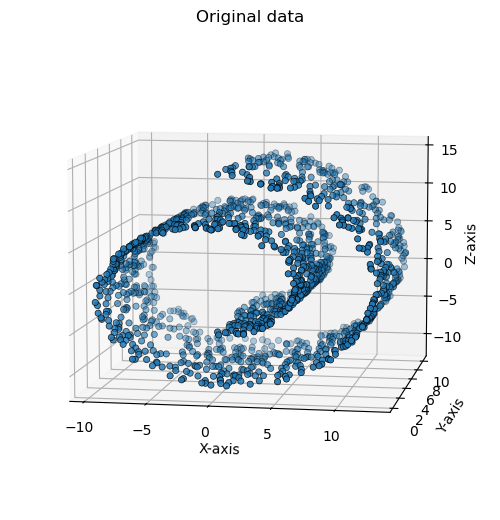

In [9]:
plot_3d(X, title='Original data')

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
y_pred = AgglomerativeClustering(n_clusters=6).fit_predict(X_scaled)

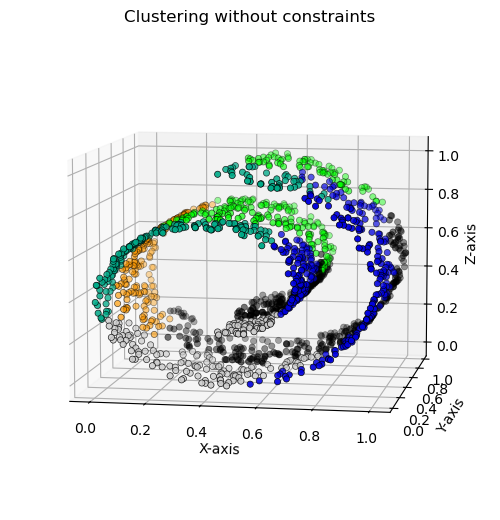

In [12]:
plot_3d(X_scaled, y=y_pred, title='Clustering without constraints')

In [13]:
# Connectivity constraints

In [14]:
from sklearn.neighbors import kneighbors_graph

In [15]:
connectivity_constraint = kneighbors_graph(X_scaled, n_neighbors=10)

In [16]:
y_pred_constrained = AgglomerativeClustering(n_clusters=6, connectivity=connectivity_constraint).fit_predict(X_scaled)

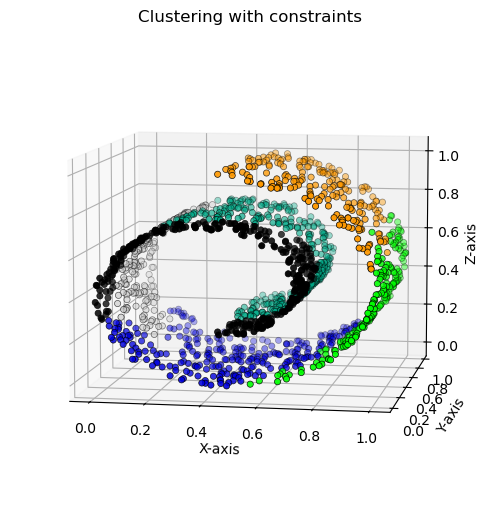

In [17]:
plot_3d(X_scaled, y=y_pred_constrained, title='Clustering with constraints')

In [18]:
# I want each cluster to have the same 'width'
# Essentially, each cluster should span the entire y range

In [19]:
weights = np.array([1, 0.1, 1])

In [20]:
X_weighted = X * weights

In [21]:
weighted_connectivity_constraint = kneighbors_graph(X_weighted, n_neighbors=10)

In [22]:
y_pred_weighted = AgglomerativeClustering(n_clusters=6, connectivity=weighted_connectivity_constraint).fit_predict(X_weighted)

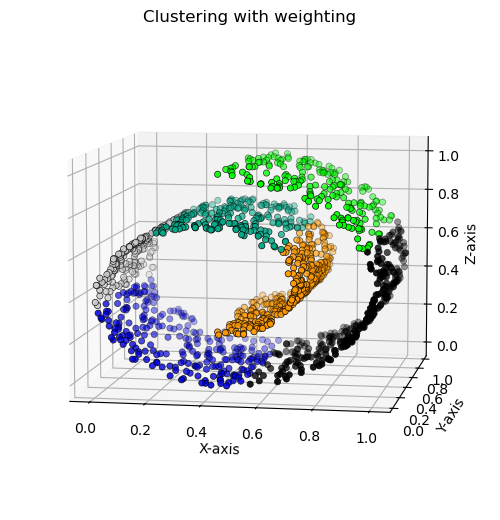

In [23]:
plot_3d(X_scaled, y=y_pred_weighted, title='Clustering with weighting')